In [1]:
import re
import pickle
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '/content/'
import seaborn as sns

In [3]:
dataset =pd.read_csv('clean_train.csv')
dataset.rename(columns={'class': 'label'}, inplace=True)

In [4]:
dataset.head()

,count,hate_speech_count,offensive_language_count,neither_count,label,tweet,clean_tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain cleaning house . man a...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold.tyga dwn bad cuffin dat hoe st p...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg ever fuck bitch start cry confused shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [5]:
print(dataset.shape)

(24783, 7)


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
stopwords_list = 'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [7]:
dataset['clean_tweets'] = dataset['clean_tweets'].apply(lambda x: str(x))

In [8]:
dataset.head()

,count,hate_speech_count,offensive_language_count,neither_count,label,tweet,clean_tweets
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain cleaning house . man a...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats cold.tyga dwn bad cuffin dat hoe st p...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Dawg ever fuck bitch start cry confused shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [9]:
def data_summary(dataset):

    """
    This function will print the summary of the reviews and words distribution in the dataset.

    Args:
        dataset: list of cleaned sentences

    Returns:
        Number of documnets per class: int
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.clean_tweets) for word in t.strip().split()]
    class_label= [k for k,v in dataset.label.value_counts().to_dict().items()]
  # find word list
    for label in class_label:
        word_list = [word.strip().lower() for t in list(dataset[dataset.label==label].clean_tweets) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.label==label].clean_tweets)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class
        u_words.append(len(np.unique(word_list)))

        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.label==label].clean_tweets))))
        print("Number of Words:{}".format(len(word_list)))
        print("Number of Unique Words:{}".format(len(np.unique(word_list))))
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))

    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)


Class Name :  1
Number of Documents:19190
Number of Words:157558
Number of Unique Words:16289
Most Frequent Words:

bitch	8023
.	7819
,	4384
bitches	3032
hoes	2306
like	2302
pussy	2059
hoe	1838
im	1778
dont	1507

Class Name :  2
Number of Documents:4163
Number of Words:38321
Number of Unique Words:9853
Most Frequent Words:

.	2551
,	1344
trash	687
like	302
bird	294
charlie	255
yankees	223
im	221
yellow	214
dont	174

Class Name :  0
Number of Documents:1430
Number of Words:12231
Number of Unique Words:3517
Most Frequent Words:

.	766
,	357
bitch	209
faggot	189
like	167
nigga	139
ass	137
white	126
fuck	121
trash	113
Total Number of Unique Words:21613


<ipython-input-10-46daabb39e01>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(class_names, rotation=45);


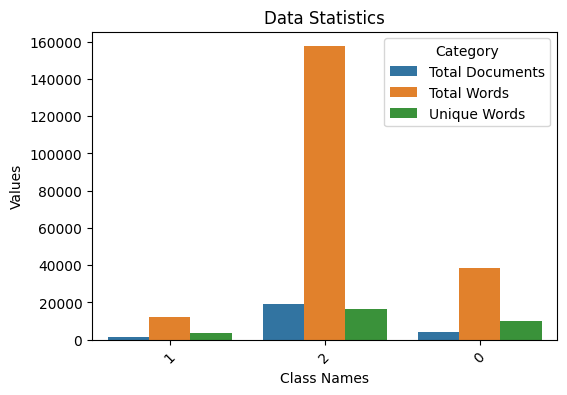

In [10]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names')
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

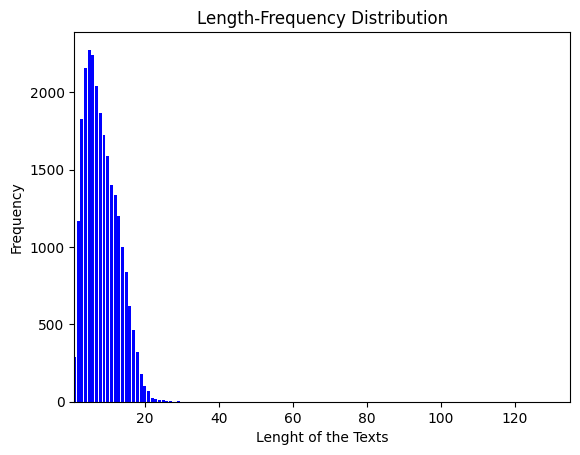

Maximum Length of a review: 47
Minimum Length of a review: 1
Average Length of a reviews: 8.0


In [11]:
# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.clean_tweets.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

In [12]:
def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format.

    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)

    Returns:
        labels: numpy array
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [13]:
def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector .

    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array)

    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])

    return X_train,X_test,y_train,y_test



def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features .

    Args:
        reviews: a list of cleaned reviews

    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(reviews)

    return tfidf,X



In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve


In [15]:

                                              #============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination():
    """
    This function consists the models defination for All gram Features

    Retuns:
        ml_models: list of models
        model_names: list of model_names

    """

    lr_model = LogisticRegression(random_state = 123, max_iter=1000)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names


                                          #============================================
                                           ####### Model Evaluation Function ############
                                           #=============================================

def model_performace(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.

    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array)
        y_test : testing encoded labels (array)

    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100
    my_dict['Precision'] = round(f1_score(y_test, pred_y, average='weighted'),4)*100
    my_dict['Recall'] = round(recall_score(y_test, pred_y , average='weighted'),4)*100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y , average='weighted'),4)*100

    return my_dict

                                        #========================================
                                        #### Model Performane into Dataframe #####
                                        #=========================================

def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.

    Args:
        performance_dict: a dictionary of all the parameters for each models

    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [16]:
## save the performance of the model for each gram feature
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.clean_tweets, gram)
    labels = label_encoding(dataset.label,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 21613

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 24783 
	Training		 19826 
	Test			 4957


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 140228

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 24783 
	Training		 19826 
	Test			 4957


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Size :======> 287349

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 24783 
	Training		 19826 
	Test			 4957


In [17]:
# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performace Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")




========== Performace Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     89.33      87.73   89.33     87.73          LR
1     87.61      87.35   87.61     87.35          DT
2     88.88      87.11   88.88     87.11          RF
3     84.53      81.59   84.53     81.59         MNB
4     80.84      78.95   80.84     78.95         KNN
5     88.54      85.94   88.54     85.94  Linear SVM
6     89.33      86.90   89.33     86.90     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by LR at = 89.33
Highest F1-Score achieved by LR at = 87.72999999999999
Highest Precision Score achieved by LR at = 87.72999999999999
Highest Recall Score achieved by LR at = 89.33

========== Performace Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     87.37      84.94   87.37     84.94          LR
1     87.71      87.54   87.71     87.54          DT
2     87.92      85.69   87.92     85.69       

<ipython-input-18-585c87e954af>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);
<ipython-input-18-585c87e954af>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);
<ipython-input-18-585c87e954af>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);


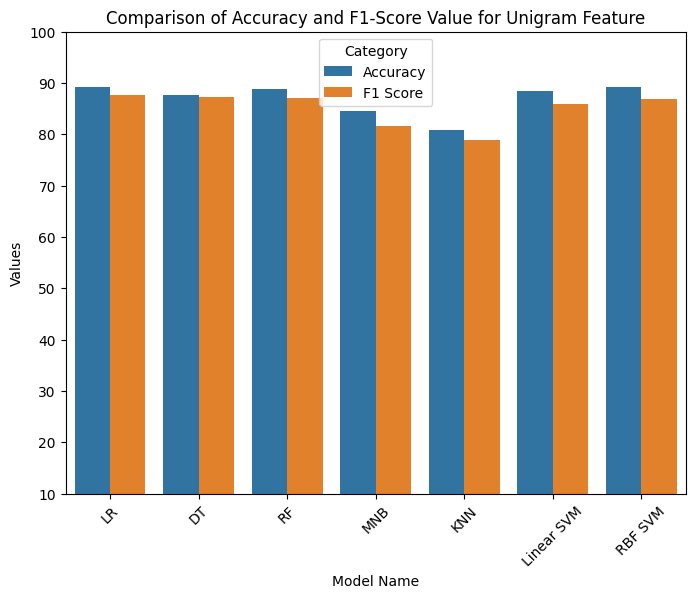

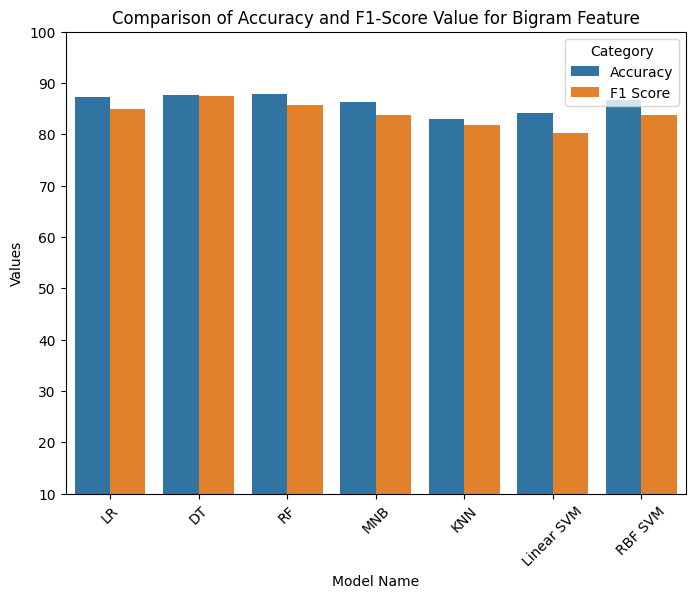

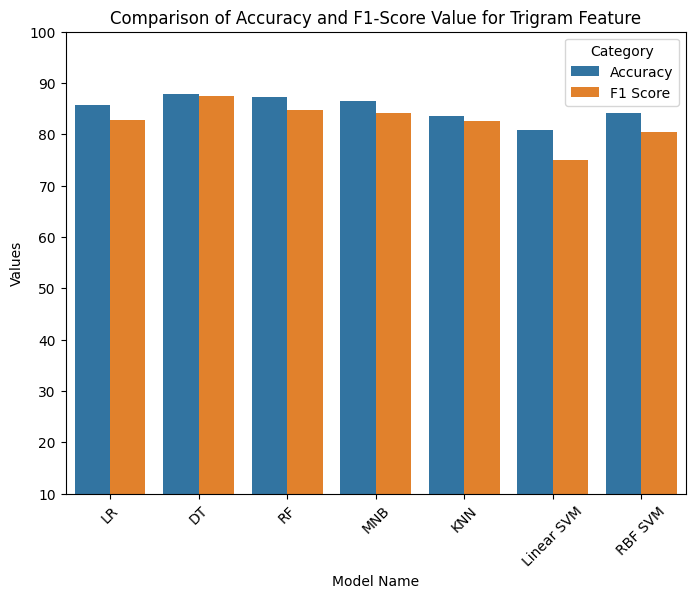

In [18]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name')
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,100])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);